# Распознавание активности (Human Activity Recognition - HAR)


Подключение модулей

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
RANDOM_STATE = 1234

## Анализ исходных данных

Описание: [Human Activity Recognition Using Smartphones Data Set](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones)


Загрузка исходных данных

In [3]:
# Наименования активностей
LABEL_NAMES_FILE = "UCI HAR Dataset/activity_labels.txt"

# Наименование столбцов признаков
FEATURE_NAMES_FILE = "UCI HAR Dataset/features.txt"

# Идентификаторы испытуемых
X_TRAIN_SUBJECT_FILE = "UCI HAR Dataset/train/subject_train.txt"


# Признаки (временные, частотные) и целевых значения (активности)

# Обучающая часть
X_TRAIN_FILE = "UCI HAR Dataset/train/X_train.txt"
Y_TRAIN_FILE = "UCI HAR Dataset/train/y_train.txt"

# Тестовая часть
X_TEST_FILE = "UCI HAR Dataset/test/X_test.txt"
Y_TEST_FILE = "UCI HAR Dataset/test/y_test.txt"

In [4]:
# Загрузка наименований активностей
LABEL_NAMES = list()
with open(LABEL_NAMES_FILE, "r") as fin:
    for line in fin:
        LABEL_NAMES.append(line.split()[1])
LABEL_NAMES

['WALKING',
 'WALKING_UPSTAIRS',
 'WALKING_DOWNSTAIRS',
 'SITTING',
 'STANDING',
 'LAYING']

In [5]:
# Загрузка наименований столбцов
CLMS = list()
with open(FEATURE_NAMES_FILE, "r") as fin:
    for line in fin:
        CLMS.append(line.split()[1])
len(CLMS)

561

In [6]:
CLMS = [str(indx+1) +"." + el for indx, el in enumerate(CLMS)]

In [7]:
# Вывод нескольких наименований
CLMS[:5]

['1.tBodyAcc-mean()-X',
 '2.tBodyAcc-mean()-Y',
 '3.tBodyAcc-mean()-Z',
 '4.tBodyAcc-std()-X',
 '5.tBodyAcc-std()-Y']

In [8]:
# Загрузка идентификаторов испытуемых
df_subjects = pd.read_csv(X_TRAIN_SUBJECT_FILE, header=None, sep="\s+", names=["subject"])
df_subjects.head()

,subject
0,1
1,1
2,1
3,1
4,1


In [9]:
# Загрузка признаков
df_features = pd.read_csv(X_TRAIN_FILE, header=None, sep="\s+", names=CLMS)
df_features.head()

,1.tBodyAcc-mean()-X,2.tBodyAcc-mean()-Y,3.tBodyAcc-mean()-Z,4.tBodyAcc-std()-X,5.tBodyAcc-std()-Y,6.tBodyAcc-std()-Z,7.tBodyAcc-mad()-X,8.tBodyAcc-mad()-Y,9.tBodyAcc-mad()-Z,10.tBodyAcc-max()-X,...,552.fBodyBodyGyroJerkMag-meanFreq(),553.fBodyBodyGyroJerkMag-skewness(),554.fBodyBodyGyroJerkMag-kurtosis(),"555.angle(tBodyAccMean,gravity)","556.angle(tBodyAccJerkMean),gravityMean)","557.angle(tBodyGyroMean,gravityMean)","558.angle(tBodyGyroJerkMean,gravityMean)","559.angle(X,gravityMean)","560.angle(Y,gravityMean)","561.angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [10]:
# Загрузка целевых значений
df_labels = pd.read_csv(Y_TRAIN_FILE, header=None, names=["activity"])
df_labels.head(5)

,activity
0,5
1,5
2,5
3,5
4,5


In [11]:
# Формирование одного датафрейма
df = pd.concat([df_subjects, df_features, df_labels], axis=1)
df.head()

,subject,1.tBodyAcc-mean()-X,2.tBodyAcc-mean()-Y,3.tBodyAcc-mean()-Z,4.tBodyAcc-std()-X,5.tBodyAcc-std()-Y,6.tBodyAcc-std()-Z,7.tBodyAcc-mad()-X,8.tBodyAcc-mad()-Y,9.tBodyAcc-mad()-Z,...,553.fBodyBodyGyroJerkMag-skewness(),554.fBodyBodyGyroJerkMag-kurtosis(),"555.angle(tBodyAccMean,gravity)","556.angle(tBodyAccJerkMean),gravityMean)","557.angle(tBodyGyroMean,gravityMean)","558.angle(tBodyGyroJerkMean,gravityMean)","559.angle(X,gravityMean)","560.angle(Y,gravityMean)","561.angle(Z,gravityMean)",activity
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,5
1,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,5
2,1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,5
3,1,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,5
4,1,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,5


Отображение количества различных активностей

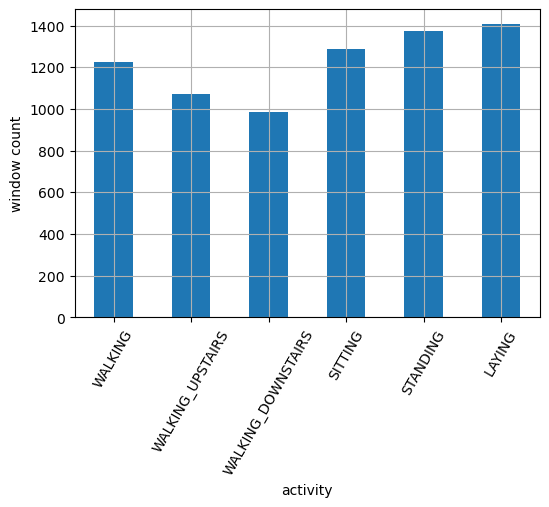

In [12]:
fig, ax = plt.subplots(1, 1)

fig.set_figheight(4)
fig.set_figwidth(6)


ax = df.groupby("activity").size().plot.bar(ax=ax)
ax.set_xticklabels(LABEL_NAMES, rotation=60)
ax.set_ylabel("window count")
ax.grid(True)

Распредление активностей 5го испытуемого

In [13]:
SUBJECT_ID = 5

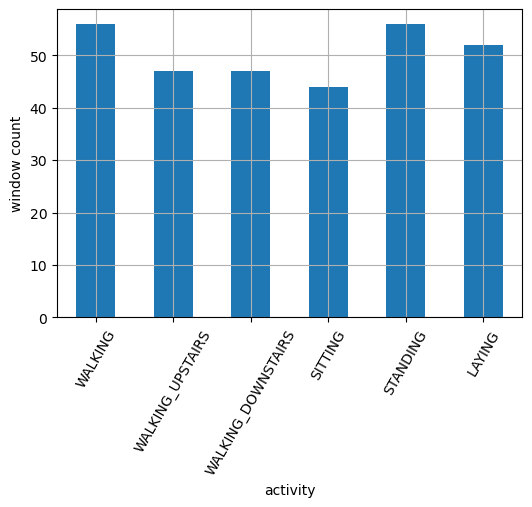

In [14]:
fig, ax = plt.subplots(1, 1)

fig.set_figheight(4)
fig.set_figwidth(6)

ax = df[df["subject"]==SUBJECT_ID]\
    .groupby("activity")\
    .size()\
    .plot.bar(ax=ax)
ax.set_xticklabels(LABEL_NAMES, rotation=60)
ax.set_ylabel("window count")
ax.grid(True)

Отображение данных от акселерометра по координатам

In [15]:
ACC_CLMS = ["1.tBodyAcc-mean()-X", "2.tBodyAcc-mean()-Y", "3.tBodyAcc-mean()-Z", "activity"]

df_acc = df.loc[
    df["subject"]==SUBJECT_ID,
    ACC_CLMS
]

df_acc.index = range(len(df_acc))
df_acc.head()

,1.tBodyAcc-mean()-X,2.tBodyAcc-mean()-Y,3.tBodyAcc-mean()-Z,activity
0,0.196957,0.056390,0.121614,5
1,0.248923,-0.050815,-0.040399,5
2,0.297451,-0.053720,-0.155012,5
3,0.310160,0.018053,-0.223672,5
4,0.301709,-0.002388,-0.143067,5


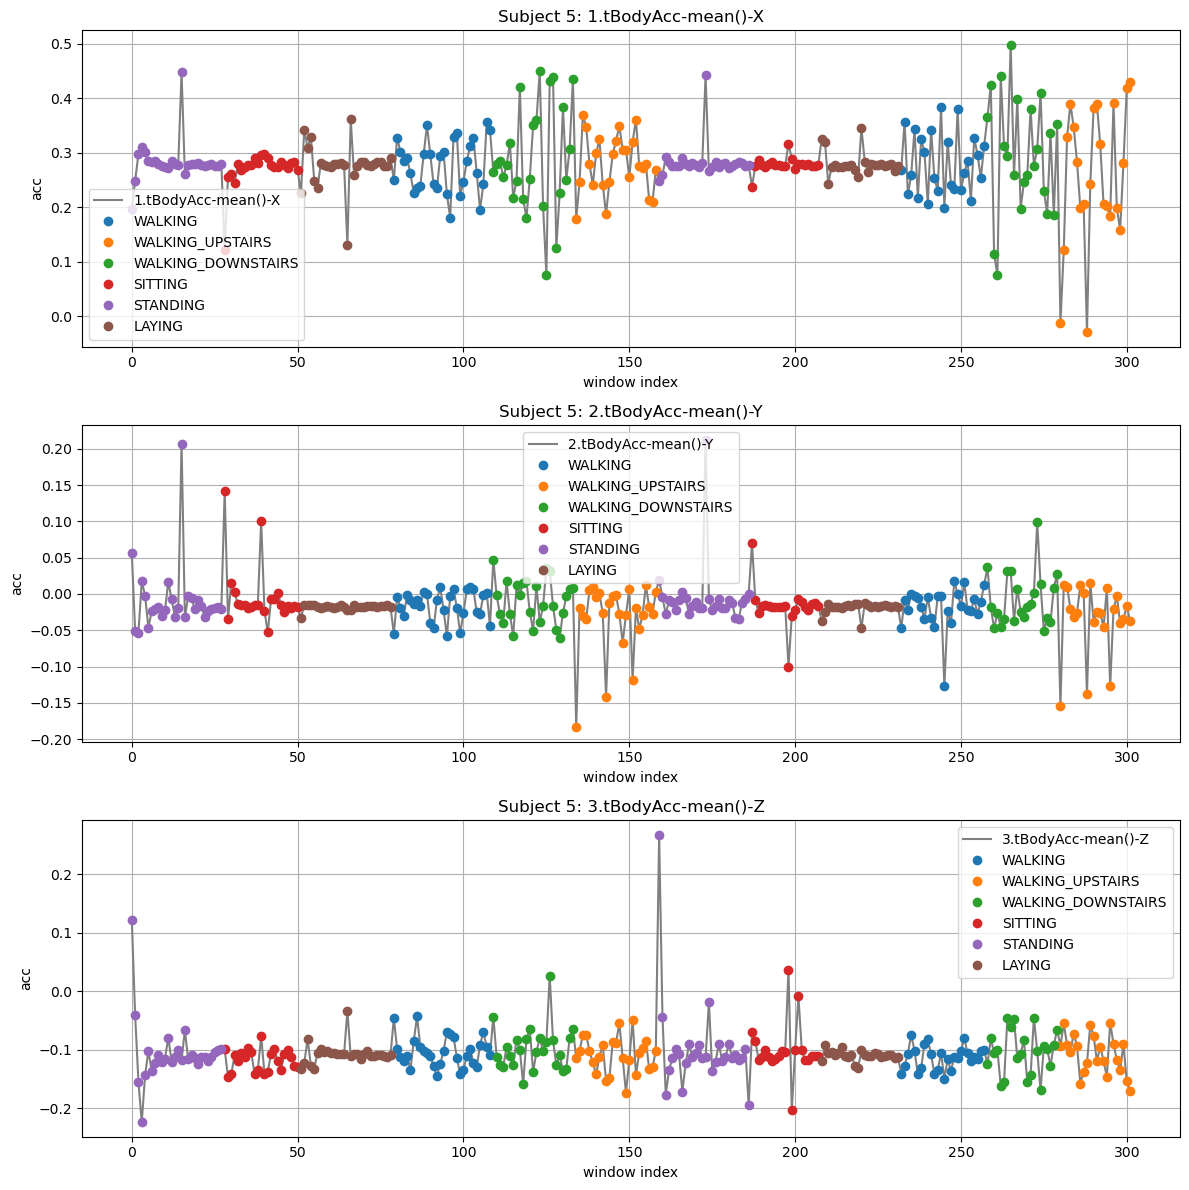

In [16]:
fig, axes = plt.subplots(3, 1)

fig.set_figheight(12)
fig.set_figwidth(12)

for indx, ax in enumerate(axes):

    df_acc[ACC_CLMS[indx]].plot(ax=ax, color="grey")

    ax.set_title("Subject {}: {}".format(SUBJECT_ID, ACC_CLMS[indx]))
    ax.set_xlabel("window index")
    ax.set_ylabel("acc")

    for i in range(1, len(LABEL_NAMES)+1):
        df_acc[df_acc["activity"]==i][ACC_CLMS[indx]].plot(
            marker="o", linestyle="", ax=ax, 
            label=LABEL_NAMES[i-1]
        )

    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

## Выбор модели распознования из алгоритмов классического машинного обучения

In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.utils import shuffle

In [18]:
df_ = shuffle(df, random_state=RANDOM_STATE)
df_.head()

,subject,1.tBodyAcc-mean()-X,2.tBodyAcc-mean()-Y,3.tBodyAcc-mean()-Z,4.tBodyAcc-std()-X,5.tBodyAcc-std()-Y,6.tBodyAcc-std()-Z,7.tBodyAcc-mad()-X,8.tBodyAcc-mad()-Y,9.tBodyAcc-mad()-Z,...,553.fBodyBodyGyroJerkMag-skewness(),554.fBodyBodyGyroJerkMag-kurtosis(),"555.angle(tBodyAccMean,gravity)","556.angle(tBodyAccJerkMean),gravityMean)","557.angle(tBodyGyroMean,gravityMean)","558.angle(tBodyGyroJerkMean,gravityMean)","559.angle(X,gravityMean)","560.angle(Y,gravityMean)","561.angle(Z,gravityMean)",activity
1470,7,0.246255,-0.039082,-0.114684,-0.318453,-0.336475,-0.003599,-0.381447,-0.343053,0.045346,...,-0.183471,-0.516367,0.110390,0.457350,-0.744585,-0.831943,-0.385926,0.218434,0.436918,2
4840,23,0.261933,-0.041950,-0.131327,-0.323033,0.053590,-0.028440,-0.360936,-0.003593,-0.017121,...,-0.454167,-0.801923,-0.069459,0.500267,-0.936146,-0.656293,-0.624679,0.229113,0.248588,2
4452,22,0.256245,-0.019401,-0.087495,-0.970080,-0.927425,-0.945617,-0.973806,-0.938127,-0.952608,...,0.522123,0.273620,-0.248984,0.290842,-0.511779,0.520481,0.456630,-0.472795,-0.522445,6
2124,11,0.283716,-0.020539,-0.098239,-0.982521,-0.871056,-0.912216,-0.985058,-0.886773,-0.914304,...,0.094511,-0.253910,0.229940,0.149448,-0.256641,-0.532602,0.365343,-0.846849,-0.003652,6
3839,19,0.278946,-0.016707,-0.110589,-0.985889,-0.993004,-0.992293,-0.986461,-0.992066,-0.992691,...,-0.585933,-0.853961,0.171428,-0.196069,0.739945,-0.386110,0.107905,-0.369482,-0.487921,4


In [19]:
# Загрузка тестового множества
df_test_features = pd.read_csv(X_TEST_FILE, header=None, sep="\s+", names=CLMS)
df_test_labels = pd.read_csv(Y_TEST_FILE, header=None, names=["activity"])

df_test = pd.concat([df_test_features, df_test_labels], axis=1)
df_test.head()

,1.tBodyAcc-mean()-X,2.tBodyAcc-mean()-Y,3.tBodyAcc-mean()-Z,4.tBodyAcc-std()-X,5.tBodyAcc-std()-Y,6.tBodyAcc-std()-Z,7.tBodyAcc-mad()-X,8.tBodyAcc-mad()-Y,9.tBodyAcc-mad()-Z,10.tBodyAcc-max()-X,...,553.fBodyBodyGyroJerkMag-skewness(),554.fBodyBodyGyroJerkMag-kurtosis(),"555.angle(tBodyAccMean,gravity)","556.angle(tBodyAccJerkMean),gravityMean)","557.angle(tBodyGyroMean,gravityMean)","558.angle(tBodyGyroJerkMean,gravityMean)","559.angle(X,gravityMean)","560.angle(Y,gravityMean)","561.angle(Z,gravityMean)",activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,5
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,5
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,5
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,5
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,5


In [20]:
kf = StratifiedKFold(n_splits=3)

In [21]:
models = dict()

# k-ближайших соседей
models["knn"] = (
    KNeighborsClassifier(), {
        "n_neighbors": [5, 11]
    })

# Логистическая регрессия
models["logreg"] = (
    LogisticRegression(
        penalty="l2", 
        solver="newton-cg", 
        multi_class="multinomial",
        random_state=1234), {
        "C": [0.1, 1]  
    })

# Случайный лес
models["rforest"] = (
    RandomForestClassifier(
        criterion="gini",
        random_state=RANDOM_STATE), {
        "n_estimators": [50, 100]  
    })

In [22]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [23]:
df_result = pd.DataFrame(columns=["params", "accuracy"])

for name, (model, params) in models.items():
    grid = GridSearchCV(estimator=model, 
                        param_grid=params, 
                        cv=kf,
                        verbose=2)
    grid.fit(df_[CLMS], df_["activity"])
    df_result.loc[model.__class__.__name__] = (
        grid.best_params_,
        grid.score(df_test[CLMS], df_test["activity"]))

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END ......................................n_neighbors=5; total time=   0.4s
[CV] END ......................................n_neighbors=5; total time=   0.4s
[CV] END ......................................n_neighbors=5; total time=   0.4s
[CV] END .....................................n_neighbors=11; total time=   0.4s
[CV] END .....................................n_neighbors=11; total time=   0.4s
[CV] END .....................................n_neighbors=11; total time=   0.4s
Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END ..............................................C=0.1; total time=   4.2s
[CV] END ..............................................C=0.1; total time=   3.4s
[CV] END ..............................................C=0.1; total time=   3.1s
[CV] END ................................................C=1; total time=   5.6s
[CV] END ................................................C=1; total time

In [24]:
# Вывод лучших моделей, их параметров и доли правильных классификаций
df_result.head()

,params,accuracy
KNeighborsClassifier,{'n_neighbors': 5},0.901595
LogisticRegression,{'C': 1},0.961317
RandomForestClassifier,{'n_estimators': 100},0.920597


## Использование сверточной нейронной сети

In [25]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

In [26]:
# преобразование данных для сверточной нейронной сети
X_train = df_[CLMS].to_numpy()
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

X_test = df_test[CLMS].to_numpy()
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

y_train = df_["activity"].to_numpy()
y_test = df_test["activity"].to_numpy()

In [27]:
# Преобразование меток в категории
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train.ravel())
y_test = encoder.transform(y_test.ravel())

# Преобразование меток в one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [28]:
y_train.shape

(7352, 6)

In [29]:
# Создание модели
model = Sequential()
# Первый свёрточный слой
model.add(Conv1D(64, 2, activation='relu', input_shape=(X_train.shape[1], 1)))
# Первый слой подвыборки
model.add(MaxPooling1D(pool_size=2))
# Первый слой Dropout
model.add(Dropout(0.5))
# Второй свёрточный слой
model.add(Conv1D(128, 2, activation='relu'))
# Второй слой подвыборки
model.add(MaxPooling1D(pool_size=2))
# Второй слой Dropout
model.add(Dropout(0.5))
# Слой выравнивания
model.add(Flatten())
# Полносвязный слой
model.add(Dense(256, activation='relu'))
# Третий слой Dropout
model.add(Dropout(0.5))
# Выходной слой
model.add(Dense(y_train.shape[1], activation='softmax'))
# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
# Обучение модели
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
230/230 [==============================] - 14s 57ms/step - loss: 0.6456 - accuracy: 0.7327 - val_loss: 0.2626 - val_accuracy: 0.9036
Epoch 2/20
230/230 [==============================] - 15s 64ms/step - loss: 0.2846 - accuracy: 0.8836 - val_loss: 0.2970 - val_accuracy: 0.8700
Epoch 3/20
230/230 [==============================] - 13s 57ms/step - loss: 0.2124 - accuracy: 0.9157 - val_loss: 0.2553 - val_accuracy: 0.8897
Epoch 4/20
230/230 [==============================] - 12s 54ms/step - loss: 0.1744 - accuracy: 0.9327 - val_loss: 0.1833 - val_accuracy: 0.9301
Epoch 5/20
230/230 [==============================] - 14s 62ms/step - loss: 0.1625 - accuracy: 0.9358 - val_loss: 0.2142 - val_accuracy: 0.9220
Epoch 6/20
230/230 [==============================] - 13s 55ms/step - loss: 0.1432 - accuracy: 0.9426 - val_loss: 0.2497 - val_accuracy: 0.9070
Epoch 7/20
230/230 [==============================] - 12s 54ms/step - loss: 0.1291 - accuracy: 0.9472 - val_loss: 0.1830 - val_accuracy:

In [31]:
# Оценка модели
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

93/93 [==============================] - 1s 12ms/step - loss: 0.1596 - accuracy: 0.9471
Accuracy: 94.71%


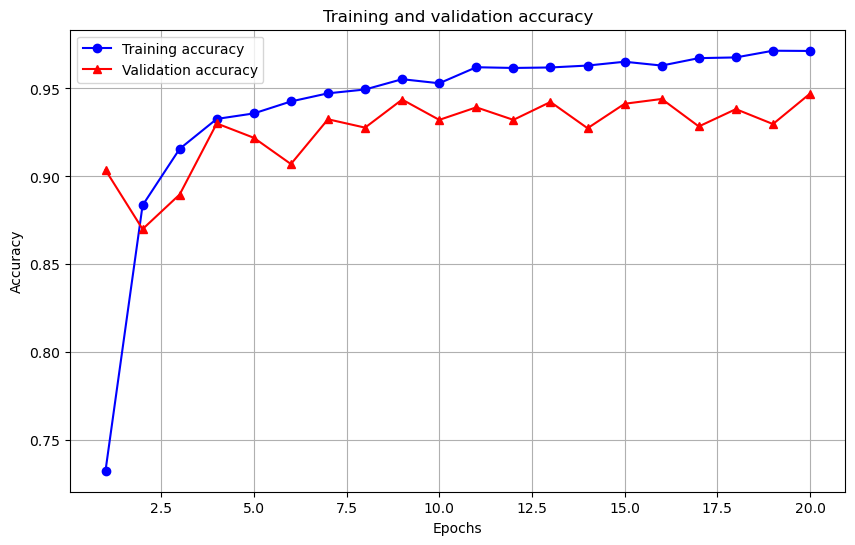

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

# Построение графика точности обучения и валидации
plt.figure(figsize=(10, 6))
plt.plot(epochs, acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'r^-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [34]:
# Получение предсказаний
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

93/93 [==============================] - 1s 11ms/step


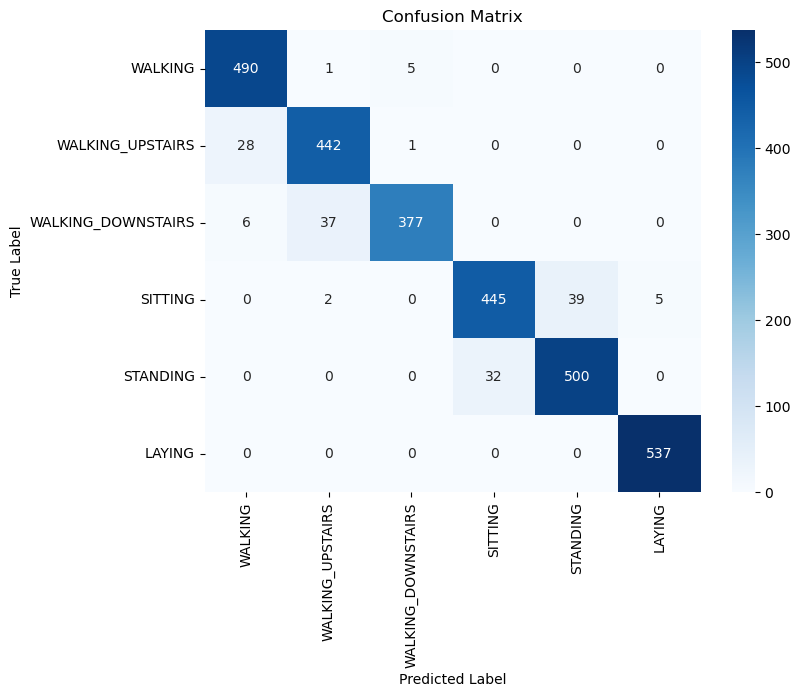

In [35]:
# Вычисление матрицы ошибок
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=LABEL_NAMES, yticklabels=LABEL_NAMES)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Вывод
<p>Для распознавания активностей человека можно применять как алгоритмы классического машинного обучения(метод ближайших соседей, логистическая регрессия, случайный лес и т.д.), так и алгоритмы нейронных сетей, в частности сверточные. </p>